In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
df = pd.read_csv('MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates=True).dropna()

# Select the features
features = ['MinTemp', 'AvgTemp', 'Sunrise']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [3]:
# Define sequence length
sequence_length = 30

In [4]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])

X, y = np.array(X), np.array(y)

In [5]:
# Split the dataset into training and testing sets
split = int(0.8 * len(data_scaled))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X.shape[1], X.shape[2]), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3)) 
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=28, validation_split=0.1, verbose=1)

# Make predictions on the test set
test_predictions_scaled = model.predict(X_test)

# Inverse transform the entire test set for plotting
X_test_inverse = scaler.inverse_transform(X_test[:, -1, :])
y_test_inverse = scaler.inverse_transform(y_test)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Epoch 1/50
47/47 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 9/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 10/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 11/50
47/47 [

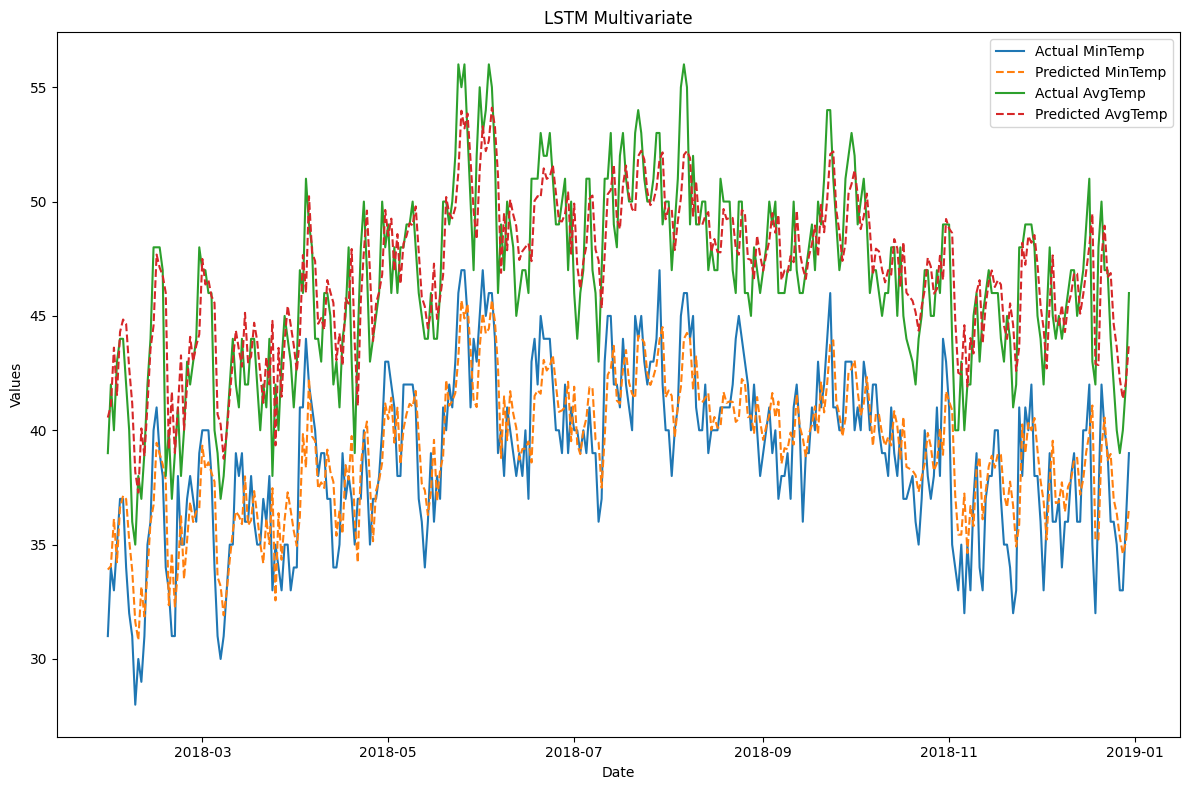

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot the results
for i in range(2):
    plt.plot(df.index[split+sequence_length:], y_test_inverse[:, i], label='Actual ' + features[i])
    plt.plot(df.index[split+sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')

plt.ylabel('Values')
plt.xlabel('Date')
plt.legend()
plt.title('LSTM Multivariate')
plt.tight_layout()
plt.show()


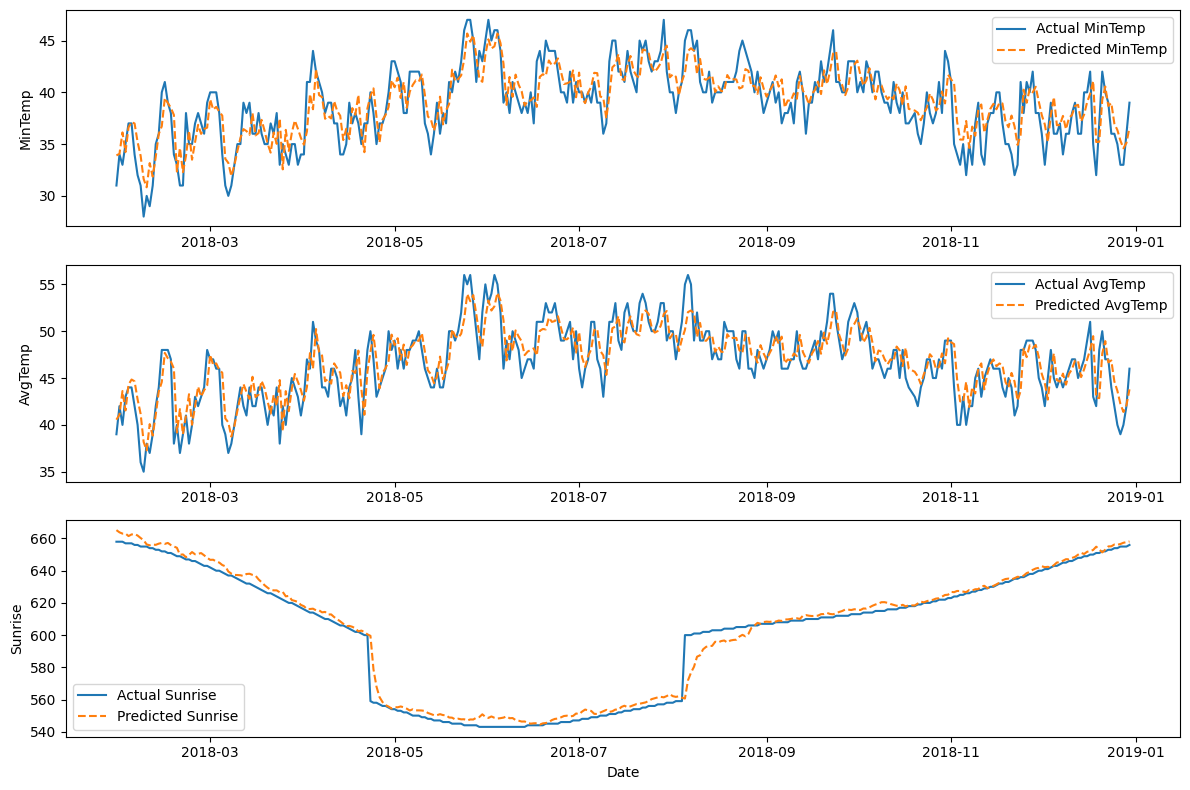

In [17]:
# Plot actual vs predicted for each feature as subplots
plt.figure(figsize=(12, 8))

# Plot the results
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(df.index[split+sequence_length:], y_test_inverse[:, i], label='Actual ' + features[i])
    plt.plot(df.index[split+sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')
    plt.ylabel(features[i])
    plt.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [18]:
# Calculate RMSE for each feature
rmse_per_feature = []
for i in range(3):
    rmse_feature = np.sqrt(mean_squared_error(y_test_inverse[:, i], test_predictions[:, i]))
    rmse_per_feature.append(rmse_feature)
    print("RMSE for", features[i], ":", rmse_feature)

RMSE for MinTemp : 2.0938779294659886
RMSE for AvgTemp : 2.2201829654411798
RMSE for Sunrise : 5.514515755185752


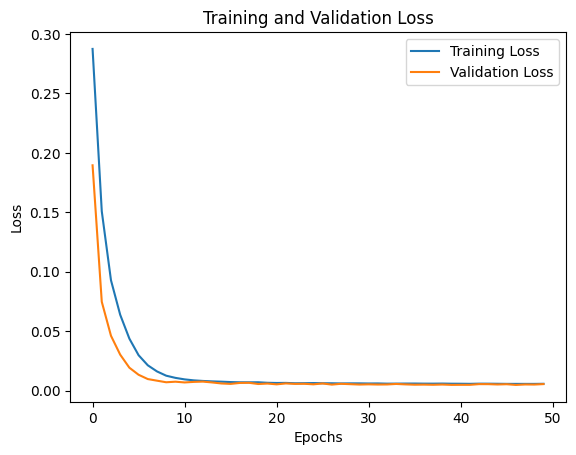

In [10]:
# Plot epochs vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()